# Autoregressive Processes

<a href="https://colab.research.google.com/github/febse/ts2025/blob/main/03-Statistics-Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## AR 1 Process

$$
x_t = \phi x_{t-1} + e_t
$$

where $ |\phi| < 1 $ and $ e_t \sim \text{i.i.d. } N(0, \sigma^2) $.


### The Expected Value

For a discrete random variable $X$ taking values $x_i$ with probabilities $p_i$, the expected value is defined as:

$$
E(X) = \sum_i x_i p_i
$$

With the following distribution as an example:

| x | 0 | 1 | 2 | 3 |
|---|---|---|---|---|
| p | 0.25 | 0.095 | 0.272 | 0.383 |

The expected value is calculated as:

$$
E(X) = 0 \cdot 0.25 + 1 \cdot 0.095 + 2 \cdot 0.272 + 3 \cdot 0.383 = 1.788
$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Switch off autocompletions

%config CompleterManager.use_jedi = False

np.random.seed(42)
example = np.random.choice([0, 1, 2], size=10, p=[0.2, 0.5, 0.3])
example

array([1, 2, 2, 1, 0, 0, 0, 2, 1, 2])

In [2]:
# The average is

example.mean()

np.float64(1.1)

In [3]:
# Which computes

(1 + 2 + 2 + 1 + 0 + 0 + 0 + 2 + 1 +  2) / 10

1.1

In [5]:
# But we can also compute the frequency of each value
pd.Series(example).value_counts(normalize=True)

2    0.4
1    0.3
0    0.3
Name: proportion, dtype: float64

In [ ]:
# And compute the average value from that

0 * 0.3 + 1 * 0.3 + 2 * 0.4

1.1

In [ ]:
px = pd.read_csv("https://github.com/febse/data/raw/refs/heads/main/ts/review/px.csv")
px

,x,p
0,0,0.250
1,1,0.095
2,2,0.272
3,3,0.383


In [21]:
E_x = (px["x"] * px["p"]).sum()
E_x

np.float64(1.788)

Text(0.5, 0, 'x')

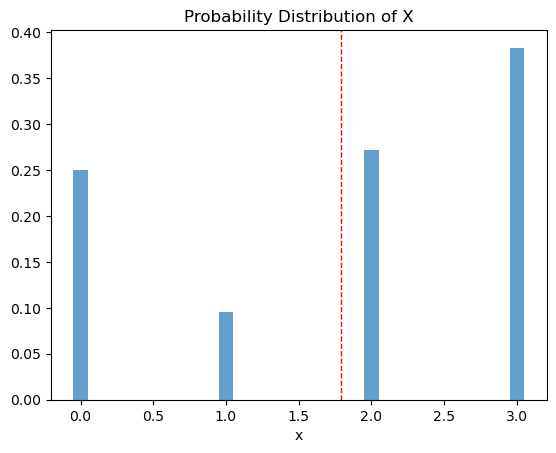

In [22]:
plt.bar(px["x"], px["p"], width=0.1, alpha=0.7)
plt.axvline(E_x, color='red', linestyle='dashed', linewidth=1)
plt.title("Probability Distribution of X")
plt.xlabel("x")

In [23]:
py = pd.read_csv("https://github.com/febse/data/raw/refs/heads/main/ts/review/py.csv")
py

,y,p
0,2,0.76
1,3,0.24


In [ ]:
# Calculate the expected value of Y


### Variance

The variance of a random variable $X$ is defined as:

$$
Var(X) = E[(X - E(X))^2] = E[X^2] - (E[X])^2
$$

For a discrete random variable the expected value is simply a sum (just as above):

$$
Var(X) = \sum_i (x_i - E(X))^2 p_i
$$

It measures how _different_ the values of the random variable are from the expected value. A distribution (random variable) with zero variance means that the random variable always takes the same value (the expected value).

For the example distribution above, the variance is:

$$
Var(X) = (0 - 1.788)^2 \cdot 0.25 + (1 - 1.788)^2 \cdot 0.095 + (2 - 1.788)^2 \cdot 0.272 + (3 - 1.788)^2 \cdot 0.383 = 1.054
$$

or using the other formula:

$$
E[X^2] = 0^2 \cdot 0.25 + 1^2 \cdot 0.095 + 2^2 \cdot 0.272 + 3^2 \cdot 0.383 = 4.63
$$

$$
Var(X) = 4.095 - (1.788)^2 = 1.433056
$$

The square root of the variance is called the standard deviation:

$$
SD(X) = \sqrt{Var(X)} = 1.197
$$


In [25]:
var_x = (((px["x"] - E_x) ** 2 )* px["p"]).sum()
var_x

np.float64(1.433056)

In [26]:
sd_x = np.sqrt(var_x)
sd_x

np.float64(1.1971031701570254)

In [ ]:
# Calculate the variance and standard deviation of Y using
# both the direct formula and the shortcut formula, also compute it manually 
# on paper



## Joint Probability Distributions
 

In [29]:
pxy = pd.read_csv("https://github.com/febse/data/raw/refs/heads/main/ts/review/pxy.csv")[['x', 'y', 'p']]
pxy

,x,y,p
0,0,2,0.241
1,0,3,0.009
2,1,2,0.089
3,1,3,0.006
4,2,2,0.229
5,2,3,0.043
6,3,2,0.201
7,3,3,0.182


In [ ]:
pxy.pivot(
    index='x',
    columns='y',
    values='p'
).add_prefix('y=').round(3)

y,y=2,y=3
x,,
0,0.241,0.009
1,0.089,0.006
2,0.229,0.043
3,0.201,0.182


### Conditional Distributions



In [35]:
# Keep the rows where x=1 and select only the columns y and p
pxy_x1 = pxy[pxy['x'] == 1][['y', 'p']]

# Divide the joint probabilities by the marginal probability of x=1
pxy_x1["p_x=1"] = pxy_x1['p'] / pxy_x1['p'].sum()
pxy_x1


,y,p,p_x=1
2,2,0.089,0.936842
3,3,0.006,0.063158


### Conditional Expectation


In [36]:
(pxy_x1["p_x=1"] * pxy_x1['y']).sum()

np.float64(2.063157894736842)

In [ ]:
# Compute the conditional expectation E(X|Y=2)


### Covariance and Correlation

It is useful to start with the definition of the sample covariance between two sets of values $X$ and $Y$:

$$
S_{xy} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})
$$

and the correlation:

$$
-1 \leq r_{xy} = \frac{S_{xy}}{S_x S_y} \leq 1
$$

where $S_x$ and $S_y$ are the sample standard deviations of $X$ and $Y$ respectively.

The covariance 
[[ 3.12789451  9.50350079]
 [ 9.50350079 56.32463836]]
The correlation 
[[1.         0.71599231]
 [0.71599231 1.        ]]


Text(0, 0.5, 'y')

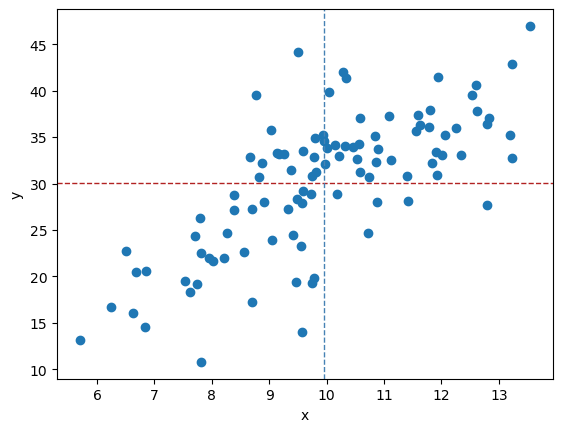

In [71]:
x = np.random.normal(loc=10, scale=2, size=100)
y = 3 * x + np.random.normal(loc=0, scale=5, size=100)

print("The covariance ")
print(np.cov(x, y))

print("The correlation ")
print(np.corrcoef(x, y))

plt.scatter(x, y)
plt.axhline(y=np.mean(y), color='firebrick', linestyle='dashed', linewidth=1)
plt.axvline(x=np.mean(x), color='steelblue', linestyle='dashed', linewidth=1)
plt.xlabel("x")
plt.ylabel("y")

In [60]:
np.cov(x, y)

array([[ 4.07309585, 12.96508399],
       [12.96508399, 65.63964124]])

In [61]:
np.corrcoef(x, y)

array([[1.      , 0.792921],
       [0.792921, 1.      ]])

### Covariance of Random Variables

$$
Cov(X, Y) = E[(X - E(X))(Y - E(Y))] = E[XY] - E[X]E[Y]
$$

In [55]:
# Compute the covariance between X and Y

pxy

,x,y,p
0,0,2,0.241
1,0,3,0.009
2,1,2,0.089
3,1,3,0.006
4,2,2,0.229
5,2,3,0.043
6,3,2,0.201
7,3,3,0.182


In [ ]:
# Compute the covariance between X and Y for the distribution pxy


,x,y,p,E_x,E_y,cov_xy
0,0,2,0.241,1.788,2.24,0.103418
1,0,3,0.009,1.788,2.24,-0.012230
2,1,2,0.089,1.788,2.24,0.016832
3,1,3,0.006,1.788,2.24,-0.003593
4,2,2,0.229,1.788,2.24,-0.011652
5,2,3,0.043,1.788,2.24,0.006928
6,3,2,0.201,1.788,2.24,-0.058467
7,3,3,0.182,1.788,2.24,0.167644


## Useful Relations

The expected value of constant is the constant itself:

$$
E(c) = c
$$

The expected value of a constant times a random variable is:

$$
E(cX) = cE(X)
$$

The expected value of the sum of the random variables is the sum of their expected values:

$$
E(X + Y) = E(X) + E(Y)
$$

The variance of a random variable plus a constant $c$ is:

$$
Var(X + c) = Var(X)
$$ 

The variance of a constant times a random variable is:

$$
Var(cX) = c^2 Var(X)
$$

The variance of a sum of two random variables is:

$$
Var(X + Y) = Var(X) + Var(Y) + 2Cov(X, Y)
$$

In the case when $X$ and $Y$ are uncorrelated (i.e., $Cov(X, Y) = 0$), the variance of the sum simplifies to:

$$
Var(X + Y) = Var(X) + Var(Y)
$$

From the definition of covariance it follow that if at least one of the variables has a zero expected value, 
then the covariance reduces to the expected value of the product of the two variables:

$$
Cov(X, Y) = E[XY]
$$

### The purely random process

$$
\begin{align*}
E(e_t) & = 0 \\
Var(e_t) & = \sigma^2 \\
Cov(e_t, e_s) & = 0, \quad t \neq s \\
\end{align*}
$$

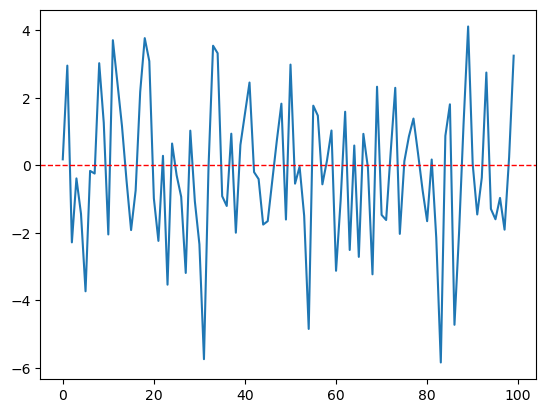

In [12]:
# Simulate a purely random process

e_t = np.random.normal(loc=0, scale=2, size=100)

plt.plot(e_t)
plt.axhline(y=0, color='red', linestyle='dashed', linewidth=1)

Using the properties above, derive the following results for a moving average process of order 1, MA(1):

$$
x_t = e_t + \theta e_{t-1}
$$

and for the MA(2) process:

$$
x_t = e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2}
$$

where $e_t$ is a process of i.i.d. random variables with zero mean and variance $\sigma^2$.

$$
\begin{align*}
E(e_t) & = 0 \\
Var(e_t) & = \sigma^2 \\
\end{align*}
$$